In [2]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt
import glob

In [6]:
import sys
print(sys.executable)

/Users/takayukiono/.pyenv/versions/3.11.4/bin/python


In [10]:
try:
    import lzma
    print("LZMA module is available.")
except ImportError:
    print("LZMA module is not available.")

LZMA module is available.


In [11]:
sample_data_folder = mne.datasets.sample.data_path()

In [12]:
sample_data_raw_file = (
    sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"
)

In [13]:
raw = mne.io.read_raw_fif(sample_data_raw_file)

In [14]:
print(raw)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.2 MB, data not loaded>


In [17]:
print(raw.info)

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


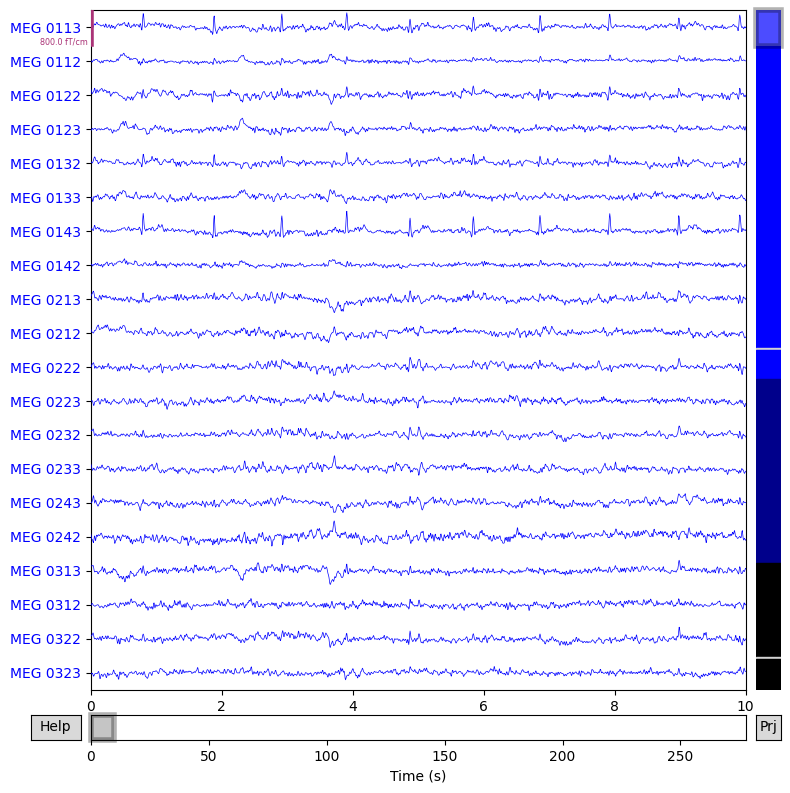

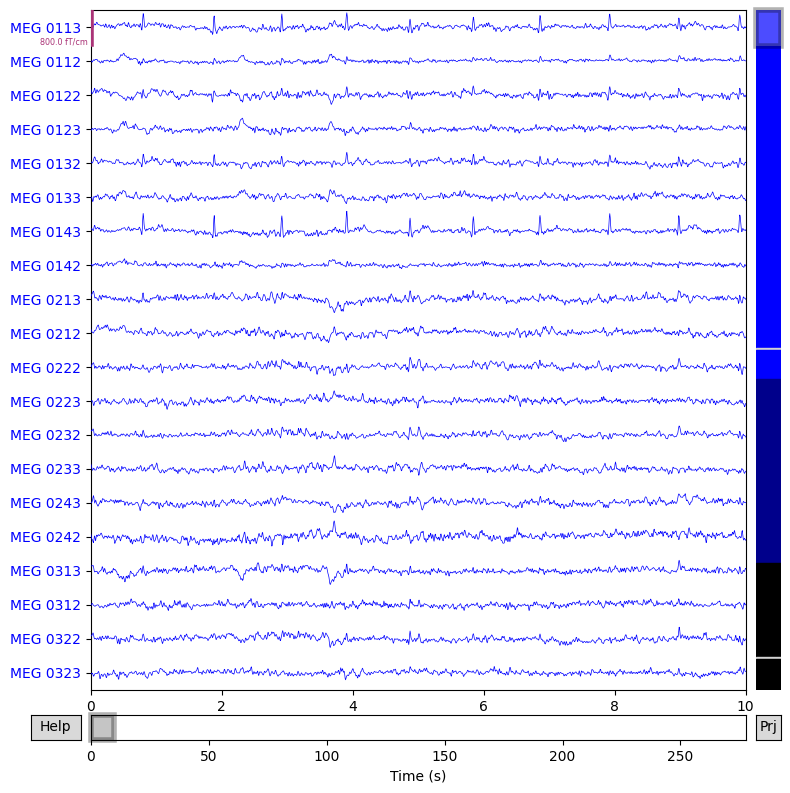

In [16]:
raw.plot()

/Users/takayukiono/.pyenv/versions/3.11.4/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


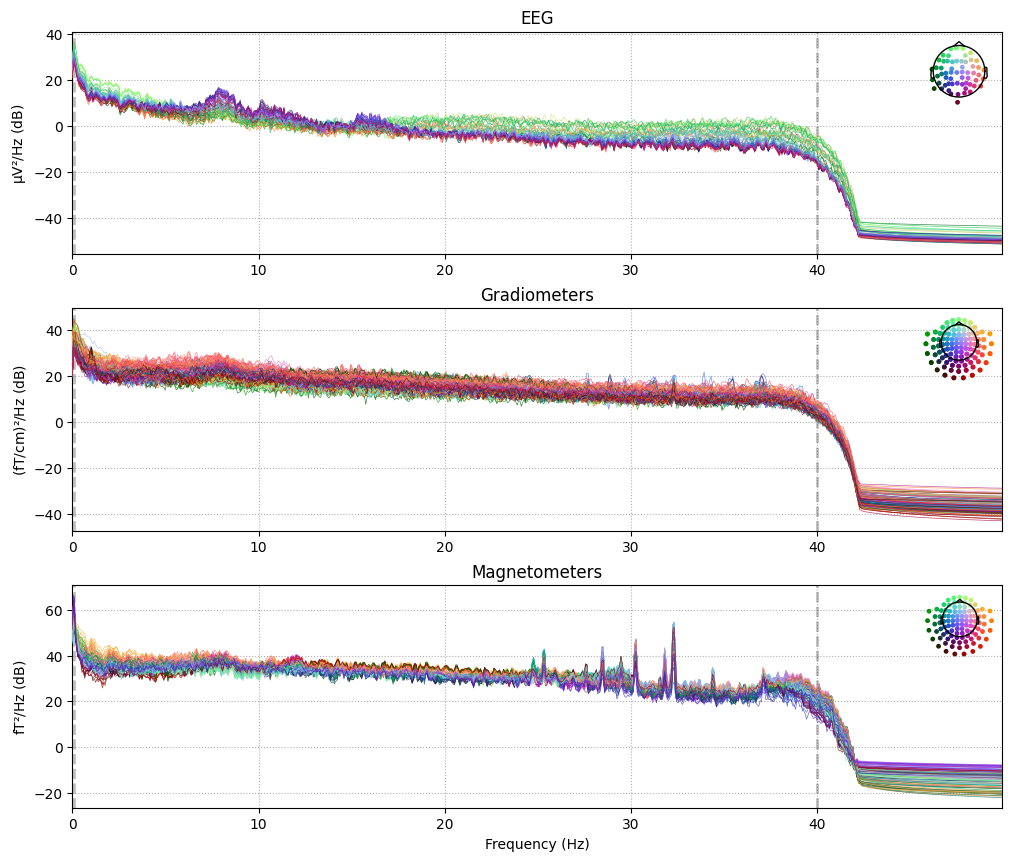

In [18]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")

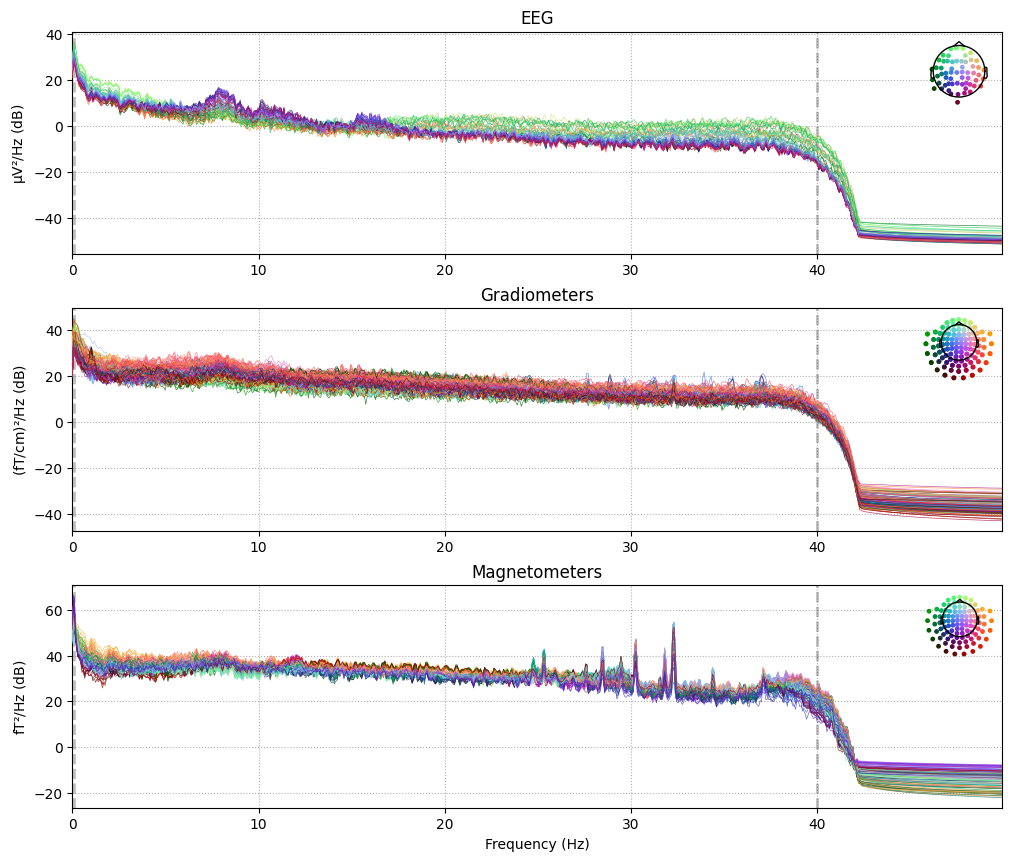

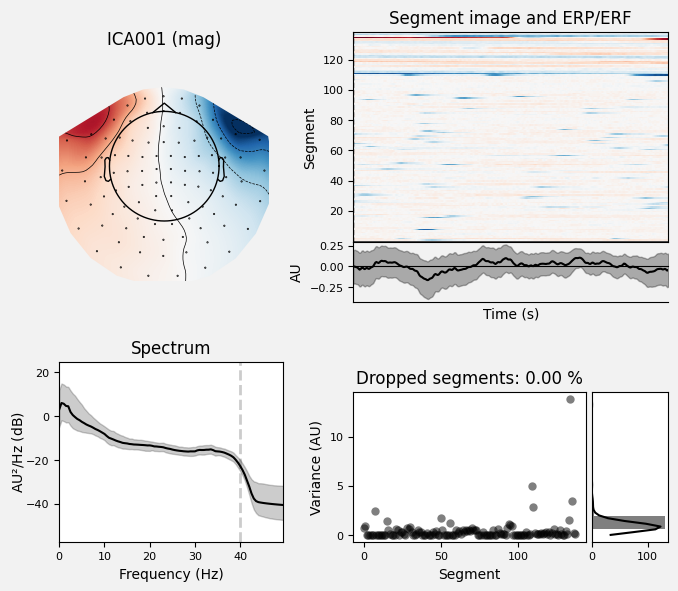

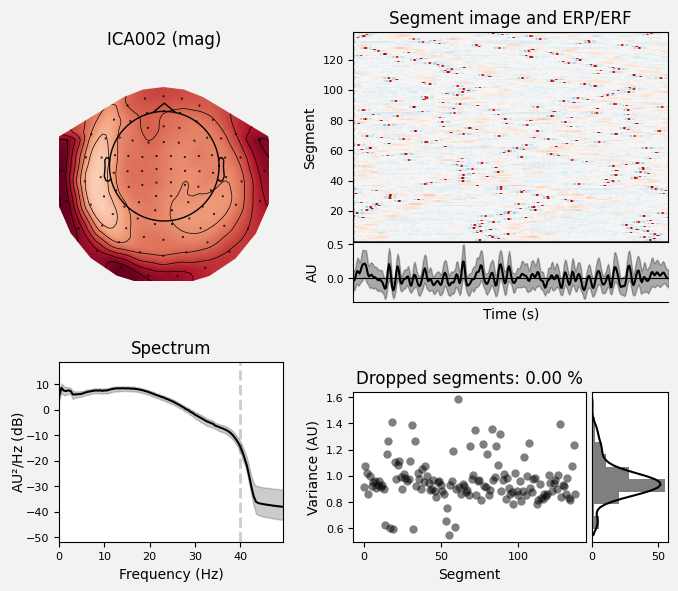

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [20]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [21]:
events = mne.find_events(raw, stim_channel="STI 014")
print(events[:5])  # show the first 5

[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [22]:
output_path = sample_data_folder / "MEG" / "sample" / "my_output_raw.fif"
raw.save(output_path, overwrite=True)

In [23]:
print(raw)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.2 MB, data not loaded>


In [24]:
 Extract the data array from the Raw object
data, times = raw[:, :]

# Print a portion of the data (e.g., first 5 channels and first 10 time points)
print("Data (first 5 channels, first 10 time points):")
print(data[:5, :10])

SyntaxError: invalid syntax (3913059847.py, line 1)

In [25]:
data, times = raw[:, :]

# Print a portion of the data (e.g., first 5 channels and first 10 time points)
print("Data (first 5 channels, first 10 time points):")
print(data[:5, :10])

Data (first 5 channels, first 10 time points):
[[-1.62244687e-12 -3.82735681e-12 -7.42095940e-12 -1.12228488e-11
  -1.32273562e-11 -1.25827672e-11 -9.97494826e-12 -6.70615680e-12
  -4.44005311e-12 -4.59533942e-12]
 [ 1.88066425e-12  3.49631541e-12  2.53839696e-12  6.53989796e-13
   1.27115225e-12  4.18301146e-12  5.80756329e-12  4.92388775e-12
   4.26545424e-12  5.58153622e-12]
 [ 2.41390174e-15  1.71297955e-14  4.07182140e-14  1.70879610e-13
   3.65835561e-13  4.12111419e-13  2.40066065e-13  6.95933733e-14
   1.07692181e-13  2.74177092e-13]
 [-1.46185594e-12 -5.03283059e-12 -1.06560486e-11 -1.32476510e-11
  -1.12404419e-11 -9.09552423e-12 -8.76179478e-12 -6.36766487e-12
  -1.28281040e-12  1.02143709e-13]
 [-1.01993650e-12 -2.93797723e-12 -1.64063393e-12  1.20147767e-12
   1.41012719e-12 -6.77081148e-13 -1.31611141e-12  4.30037946e-14
   9.35530561e-13  1.03388539e-12]]


In [27]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.2 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


In [28]:
print(raw.ch_names)

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

In [33]:
data, times = raw[:30, :1000]

In [36]:
import pandas as pd
df = pd.DataFrame(data.T, columns=raw.ch_names[:30])
print(df.head())

       MEG 0113      MEG 0112      MEG 0111      MEG 0122      MEG 0123  \
0 -1.622447e-12  1.880664e-12  2.413902e-15 -1.461856e-12 -1.019936e-12   
1 -3.827357e-12  3.496315e-12  1.712980e-14 -5.032831e-12 -2.937977e-12   
2 -7.420959e-12  2.538397e-12  4.071821e-14 -1.065605e-11 -1.640634e-12   
3 -1.122285e-11  6.539898e-13  1.708796e-13 -1.324765e-11  1.201478e-12   
4 -1.322736e-11  1.271152e-12  3.658356e-13 -1.124044e-11  1.410127e-12   

       MEG 0121      MEG 0132      MEG 0133      MEG 0131      MEG 0143  ...  \
0  1.258986e-14  1.857223e-12 -1.130182e-12 -4.949844e-14  2.810391e-12  ...   
1  1.374968e-13  1.818910e-12 -4.776099e-13 -2.687673e-14  5.269027e-12  ...   
2  2.954184e-13  1.846514e-13 -1.682961e-13  9.539043e-14  5.857925e-12  ...   
3  5.319265e-13 -9.804271e-13 -4.224677e-12  3.353036e-13  5.155492e-12  ...   
4  7.726244e-13 -1.873580e-13 -9.770597e-12  5.674314e-13  3.452575e-12  ...   

       MEG 0231      MEG 0243      MEG 0242      MEG 0241      MEG 0

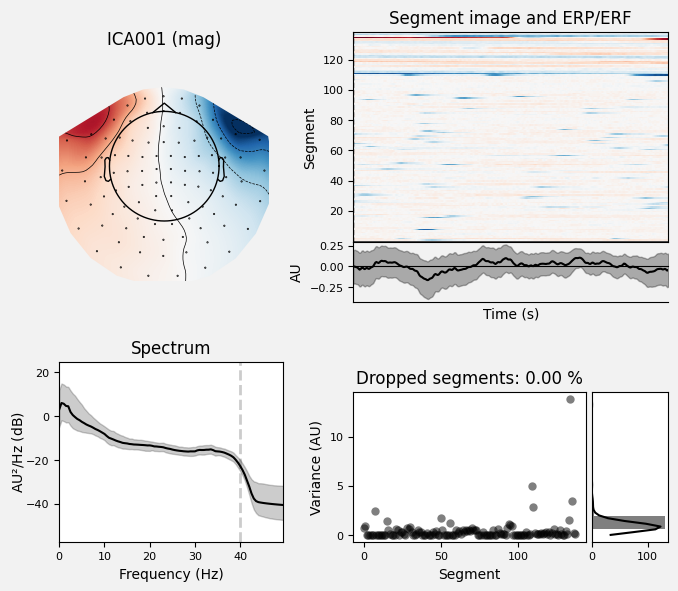

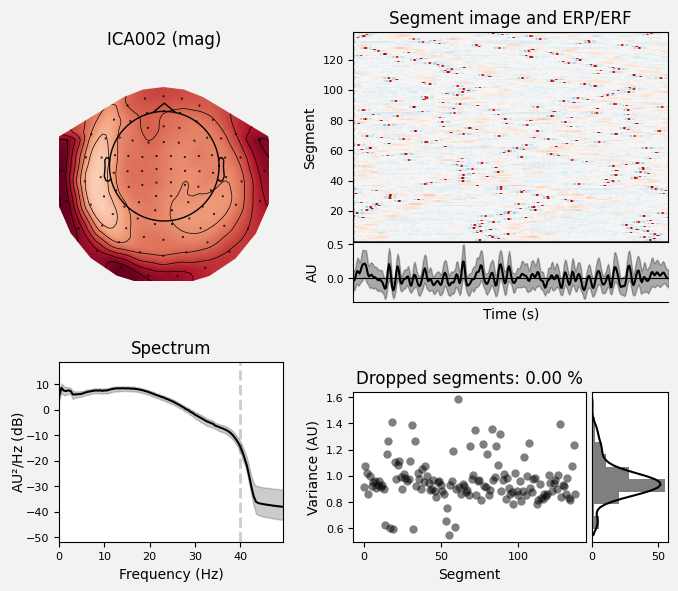

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [37]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

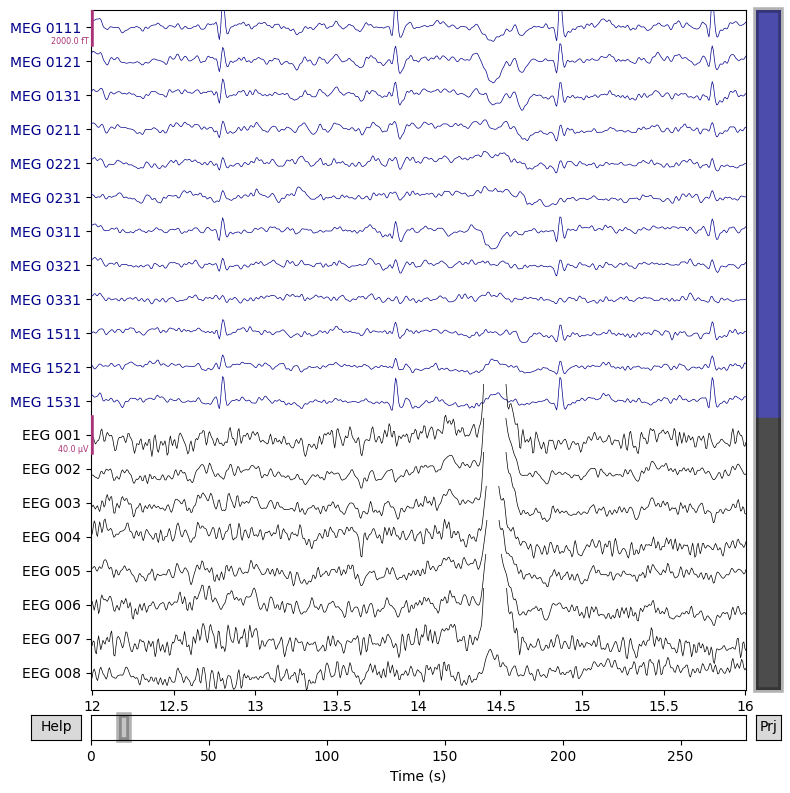

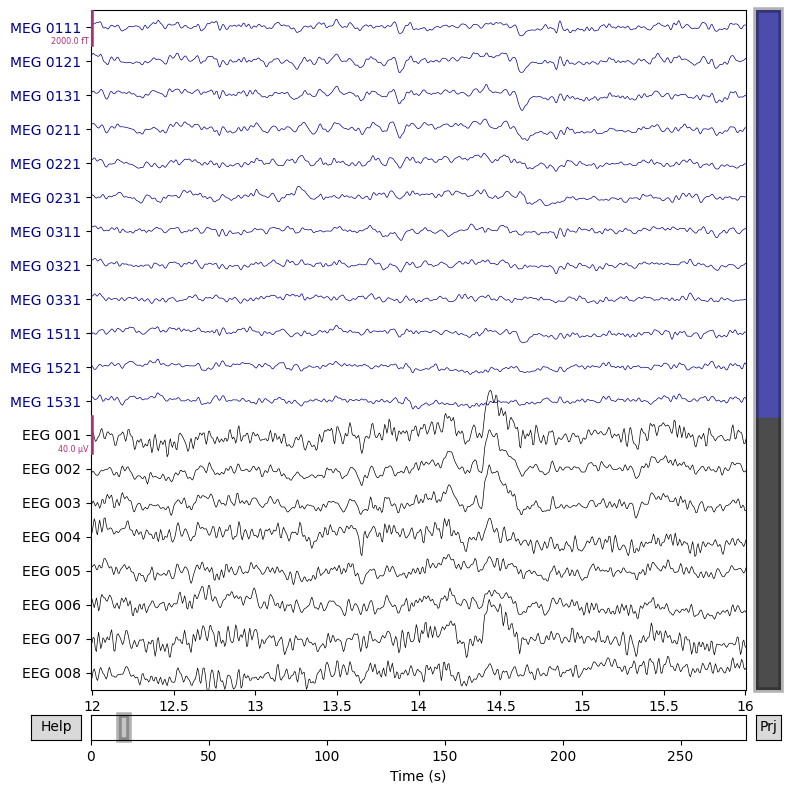

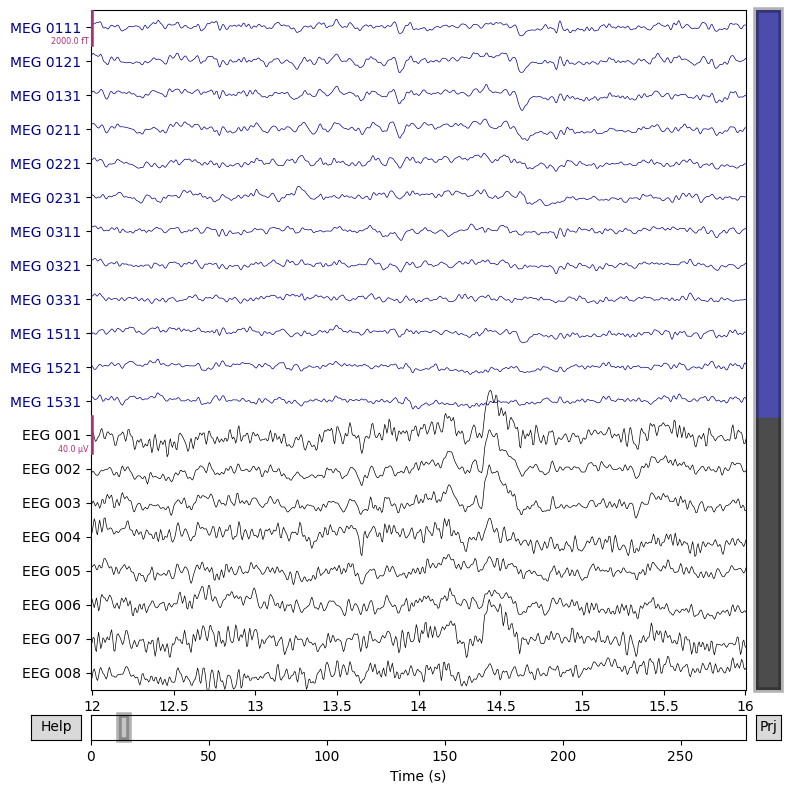

In [38]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = [
    "MEG 0111",
    "MEG 0121",
    "MEG 0131",
    "MEG 0211",
    "MEG 0221",
    "MEG 0231",
    "MEG 0311",
    "MEG 0321",
    "MEG 0331",
    "MEG 1511",
    "MEG 1521",
    "MEG 1531",
    "EEG 001",
    "EEG 002",
    "EEG 003",
    "EEG 004",
    "EEG 005",
    "EEG 006",
    "EEG 007",
    "EEG 008",
]
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

In [39]:
events = mne.find_events(raw, stim_channel="STI 014")
print(events[:5])  # show the first 5

[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [40]:
event_dict = {
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "smiley": 5,
    "buttonpress": 32,
}

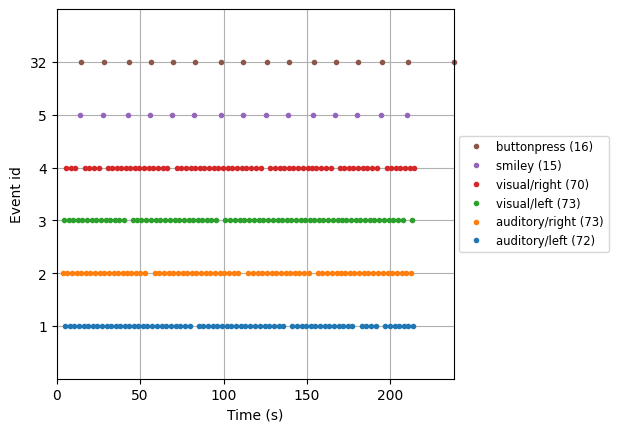

In [41]:
fig = mne.viz.plot_events(
    events, event_id=event_dict, sfreq=raw.info["sfreq"], first_samp=raw.first_samp
)